In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
### read the dataset 
health_insurance_df = pd.read_csv('../health_insurance_premium_data.csv')

In [4]:
### Explore the dataset (exploratory data analysis/EDA)
health_insurance_df.shape

(1338, 7)

In [5]:
health_insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
health_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
health_insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# check for null values 
health_insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Age feature
age_descriptive_stats = health_insurance_df['age'].describe()
age_descriptive_stats

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
health_insurance_df['age'].value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

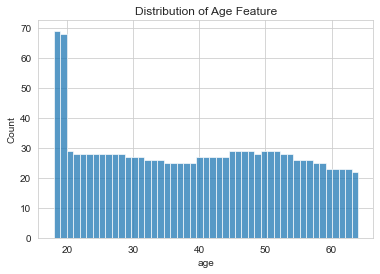

In [11]:
sns.set_style('whitegrid')
sns.histplot(x='age', data=health_insurance_df, bins=47)
plt.title('Distribution of Age Feature')
plt.show()

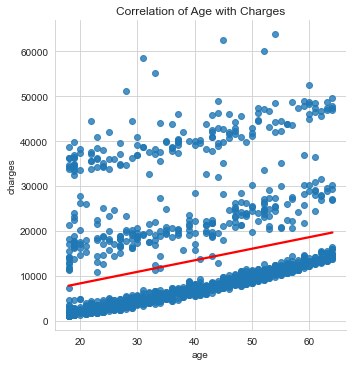

In [12]:
sns.lmplot(x='age', y='charges', data=health_insurance_df, ci=None, line_kws={'color':'red'})
plt.title('Correlation of Age with Charges')
plt.show()

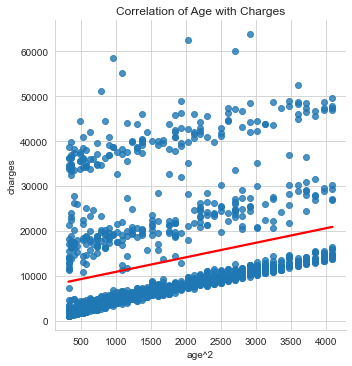

In [13]:
# make correlation slightly more linear
health_insurance_df['age^2'] = health_insurance_df['age'] ** (2)
sns.lmplot(x='age^2', y='charges', data=health_insurance_df, ci=None, line_kws={'color':'red'})
plt.title('Correlation of Age with Charges')
plt.show()

In [14]:
# BMI (body mass index) feature 
health_insurance_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [15]:
health_insurance_df['bmi'].value_counts().sort_index()

15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
         ..
48.070    1
49.060    1
50.380    1
52.580    1
53.130    1
Name: bmi, Length: 548, dtype: int64

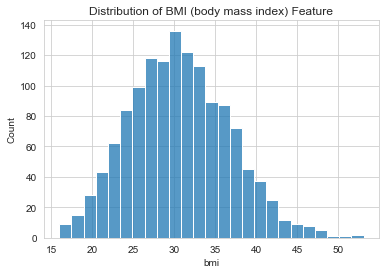

In [16]:
# BMI (body mass index) feature 
sns.histplot(x='bmi', data=health_insurance_df)
plt.title('Distribution of BMI (body mass index) Feature')
plt.show()

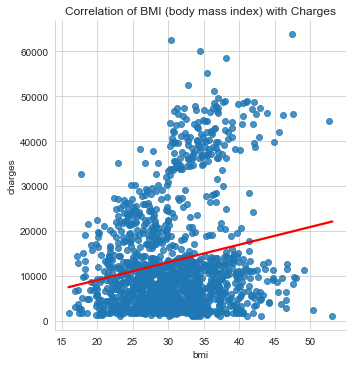

In [17]:
sns.lmplot(x='bmi', y='charges', data=health_insurance_df, ci=None, line_kws={'color':'red'})
plt.title('Correlation of BMI (body mass index) with Charges')
plt.show()

In [18]:
# Children feature 
health_insurance_df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [19]:
health_insurance_df['children'].value_counts().sort_index()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

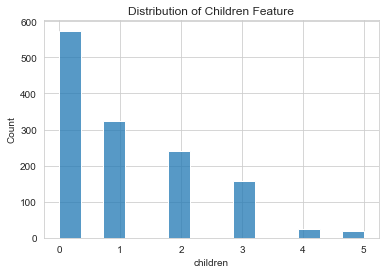

In [20]:
sns.histplot(x='children', data=health_insurance_df)
plt.title('Distribution of Children Feature')
plt.show()

In [21]:
# Smoker Feature
health_insurance_df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [22]:
smoker_values = health_insurance_df['smoker'].value_counts()
smoker_values

no     1064
yes     274
Name: smoker, dtype: int64

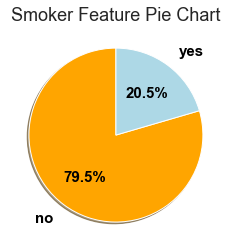

In [23]:
plt.pie(smoker_values, labels=smoker_values.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=['orange', 'lightblue'], textprops = {'color':'black', 'fontsize':15, 'fontweight':'bold'}, pctdistance=0.6, 
        labeldistance=1.2)
plt.title('Smoker Feature Pie Chart', fontsize=18)
plt.show()

In [24]:
# Sex Feature
health_insurance_df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [25]:
sex_values = health_insurance_df['sex'].value_counts()
sex_values

male      676
female    662
Name: sex, dtype: int64

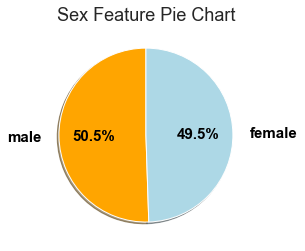

In [26]:
plt.pie(sex_values, labels=sex_values.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=['orange', 'lightblue'], textprops = {'color':'black', 'fontsize':15, 'fontweight':'bold'}, pctdistance=0.6, 
        labeldistance=1.2)
plt.title('Sex Feature Pie Chart', fontsize=18)
plt.show()

In [27]:
# Region Feature
health_insurance_df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [28]:
region_values = health_insurance_df['region'].value_counts()
region_values

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

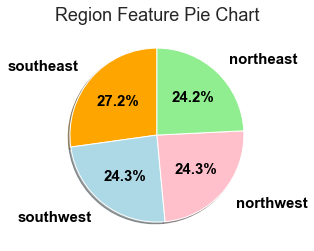

In [29]:
plt.pie(region_values, labels=region_values.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=['orange', 'lightblue', 'pink', 'lightgreen'], textprops = {'color':'black', 'fontsize':15, 'fontweight':'bold'}, pctdistance=0.6, 
        labeldistance=1.2)
plt.title('Region Feature Pie Chart', fontsize=18)
plt.show()

In [30]:
# Charges Values
health_insurance_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

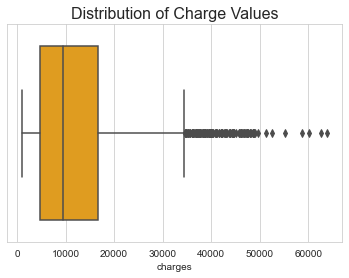

In [31]:
sns.boxplot(x='charges', data=health_insurance_df, color='orange')
plt.title('Distribution of Charge Values', fontsize=16)
plt.show()

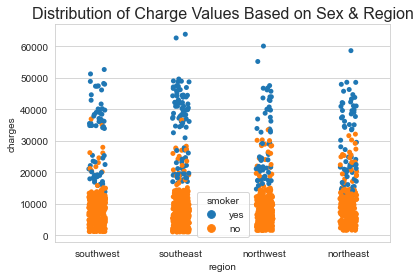

In [32]:
sns.stripplot(x='region', y='charges', data=health_insurance_df, hue='smoker');
plt.title('Distribution of Charge Values Based on Sex & Region', fontsize=16)
plt.show()

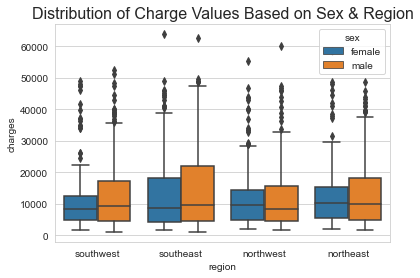

In [33]:
sns.boxplot(x='region', y='charges', data=health_insurance_df, hue='sex')
plt.title('Distribution of Charge Values Based on Sex & Region', fontsize=16)
plt.show()

In [34]:
### feature engineering
# identify the independent and dependent variables
independent_variables = health_insurance_df[['age^2', 'sex', 'bmi', 'children', 'smoker', 'region']]
dependent_variables = health_insurance_df.loc[:, 'charges']

In [35]:
dependent_variables.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
independent_variables.head()

,age^2,sex,bmi,children,smoker,region
0,361,female,27.900,0,yes,southwest
1,324,male,33.770,1,no,southeast
2,784,male,33.000,3,no,southeast
3,1089,male,22.705,0,no,northwest
4,1024,male,28.880,0,no,northwest


In [37]:
# one-hot econding (converting categorical variables)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False, drop='first')
dummy_encoded_df = pd.DataFrame(onehotencoder.fit_transform(independent_variables[['sex', 'smoker', 'region']]))
onehotencoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [38]:
dummy_encoded_df.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


In [39]:
dummy_encoded_df.columns

RangeIndex(start=0, stop=5, step=1)

In [40]:
# changing the column names of the dataframe with dummy variables 
dummy_encoded_df.columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

In [41]:
dummy_encoded_df.columns

Index(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [42]:
dummy_encoded_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


In [43]:
health_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,age^2
0,19,female,27.900,0,yes,southwest,16884.92400,361
1,18,male,33.770,1,no,southeast,1725.55230,324
2,28,male,33.000,3,no,southeast,4449.46200,784
3,33,male,22.705,0,no,northwest,21984.47061,1089
4,32,male,28.880,0,no,northwest,3866.85520,1024


In [44]:
# concating the two dataframes
health_insurance_df = pd.concat([dummy_encoded_df, health_insurance_df], axis=1)
health_insurance_df.drop(['region', 'sex', 'smoker', 'age'], axis=1, inplace=True)
health_insurance_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,children,charges,age^2
0,0.0,1.0,0.0,0.0,1.0,27.900,0,16884.92400,361
1,1.0,0.0,0.0,1.0,0.0,33.770,1,1725.55230,324
2,1.0,0.0,0.0,1.0,0.0,33.000,3,4449.46200,784
3,1.0,0.0,1.0,0.0,0.0,22.705,0,21984.47061,1089
4,1.0,0.0,1.0,0.0,0.0,28.880,0,3866.85520,1024


In [45]:
# scaling the data 
from sklearn.preprocessing import StandardScaler

for num_col in health_insurance_df[['age^2','bmi', 'children', 'charges']]:
  SS = StandardScaler()
  health_insurance_df[num_col] = SS.fit_transform(health_insurance_df[[num_col]])
health_insurance_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,children,charges,age^2
0,0.0,1.0,0.0,0.0,1.0,-0.453320,-0.908614,0.298584,-1.220462
1,1.0,0.0,0.0,1.0,0.0,0.509621,-0.078767,-0.953689,-1.253341
2,1.0,0.0,0.0,1.0,0.0,0.383307,1.580926,-0.728675,-0.844579
3,1.0,0.0,1.0,0.0,0.0,-1.305531,-0.908614,0.719843,-0.573551
4,1.0,0.0,1.0,0.0,0.0,-0.292556,-0.908614,-0.776802,-0.631311


In [46]:
# resplitting data
independent_variables = health_insurance_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi', 'children', 'age^2']]
dependent_variables = health_insurance_df.loc[:, 'charges']
independent_variables.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi,children,age^2
0,0.0,1.0,0.0,0.0,1.0,-0.453320,-0.908614,-1.220462
1,1.0,0.0,0.0,1.0,0.0,0.509621,-0.078767,-1.253341
2,1.0,0.0,0.0,1.0,0.0,0.383307,1.580926,-0.844579
3,1.0,0.0,1.0,0.0,0.0,-1.305531,-0.908614,-0.573551
4,1.0,0.0,1.0,0.0,0.0,-0.292556,-0.908614,-0.631311


In [47]:
dependent_variables.head()

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64

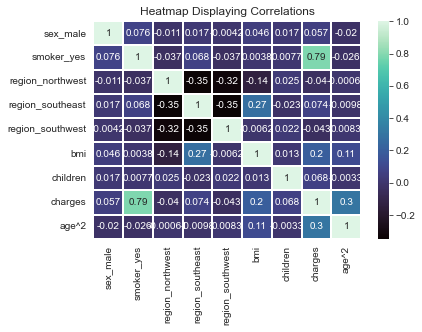

In [48]:
# check for multicollinearity
sns.heatmap(health_insurance_df.corr(), annot=True, robust=True, cmap='mako', linewidth=0.01, linecolor='w')
plt.title('Heatmap Displaying Correlations')
plt.show()

In [49]:
### Building the LinearRegression model 
# split the data into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2,random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [50]:
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
# Cross validation
cross_validation = KFold(n_splits=5, shuffle=True, random_state=10)
param_grid = {'model__alpha': np.arange(0.001, 1, 10)}
# Lasso Regularization
lasso = Lasso()
# Pipeline for future scalability
pipeline_steps = [('model', lasso)]
pipeline=Pipeline(pipeline_steps)
lasso_cross_validation = GridSearchCV(pipeline, param_grid=param_grid, cv=cross_validation)
lasso_cross_validation.fit(X_train, y_train)
lasso_cross_validation.best_params_, lasso_cross_validation.best_score_

({'model__alpha': 0.001}, 0.75472884800648)

In [51]:
y_pred = lasso_cross_validation.predict(X_test)
r2 = lasso_cross_validation.score(X_test, y_test)
r2

0.71107364374555

In [52]:
# DataFrame with the actual and predicted charges
results_df = pd.DataFrame({'Actual': y_test,'Predicted' : y_pred})
results_df.head()

,Actual,Predicted
936,1.556174,-0.315818
728,-0.913042,-0.554244
1307,0.677549,1.438276
924,-0.579901,-0.640575
137,-0.927244,-0.938342


In [53]:
# Evaluating the performance of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
rsme = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rsme) 
print('R^2:', r2)
adjusted_r2 = 1 - (1-lasso_cross_validation.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R^2:', adjusted_r2) 

Mean Absolute Error: 0.3519510061138869
Mean Squared Error: 0.28393550960582503
Root Mean Squared Error: 0.5328559933094729
R^2: 0.71107364374555
Adjusted R^2: 0.7021492775291964


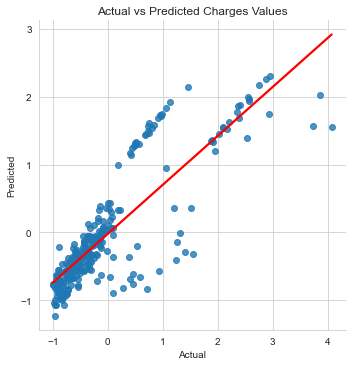

In [54]:
# plotting the results
sns.lmplot(x='Actual', y='Predicted', data=results_df, ci=None, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Charges Values')
plt.show()